# Heavy Traffic Indicators on I-94

We are going to analyze about the heavy westbound traffic on the [I-94](https://en.wikipedia.org/wiki/Interstate_94 'i-94') interstate highway.

Our main goal is to determine some of the indicators hat contribute to the heavy traffic on I-94. These indicators can come in various forms:
* Weather type
* Time of the day
* Time of the week etc.

In [1]:
import pandas as pd
inter_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv') 
inter_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
inter_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
inter_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


From the dataset, we can see that we have `48,204` rows and `9` columns. There are no null values also, we have `object`, `float64` and `int64` datatypes. The traffic data is from `2012-10-02 00:00` to `2018-09-30 23:00:00` and is described in terms of ***traffic*** and ***weather*** for every row.

The traffic data was recorded by a station located approximately midway between Minneapolis and Saint Paul. The station records westbound traffic only wich means, they record cars moving from east to west.

Our analysis will focus on the westbound traffic near that station. In other words, we should resist trying to extrapolate our findings across the entire I-94 highway.

The dataset describing this can be found at this [dataset documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume 'i-94 interstate traffic')

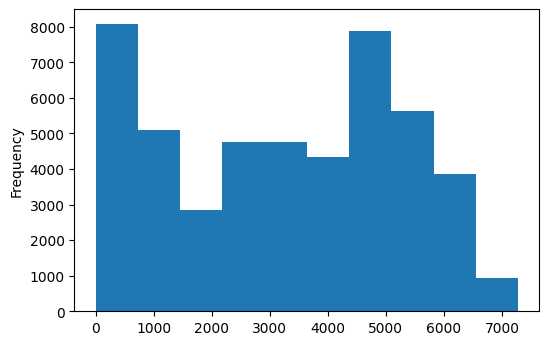

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

inter_94['traffic_volume'].plot.hist()
plt.show()

In [5]:
inter_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The traffic volume varried from 0 to 7,280 with an average of approximately 3,260 cars hourly.

Only 1,193 cars or fewer passed the station for every hour around 25% of the time,  this most likely happens at night or during road construction. However, around 75% of the time, traffic volume was four times as high with about 4,933 cars or even more than that. From this observation, we are going to analyze and compare the data in terms of daytime and nighttime

## Traffic Volume by day and night
This gives us an interesting direction for our analysis. We will see how daytime and nighttime influence traffic volume.

To do this, we'll do the following:
* `Daytime data`: hours from 7 a.m. to 7 p.m. (12 hours)
* `Nighttime data`: hours from 7 p.m. to 7 a.m. (12 hours)

Although this is not an ideal criterion for making a distinction between night and day, it is a good beginning point.

In [6]:
inter_94['date_time'] = pd.to_datetime(inter_94['date_time'])
inter_94['date_time'].dt.hour

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64

In [7]:
daytime = inter_94.copy()[(inter_94['date_time'].dt.hour >= 7) & (inter_94['date_time'].dt.hour < 19)]
print("daytime ==> ", daytime.shape)

nighttime = inter_94.copy()[(inter_94['date_time'].dt.hour >= 19) | (inter_94['date_time'].dt.hour < 7)]
print("nighttime ==> ", nighttime.shape)

daytime ==>  (23877, 9)
nighttime ==>  (24327, 9)


As you can see, there is a difference in the nubmer of rows, where daytime rows are less than that of nighttime rows. This might be because of some missing data in the dataset.

In [8]:
inter_94.iloc[176:180]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
176,None,281.17,0.0,0.0,90,Clouds,overcast clouds,2012-10-10 03:00:00,361
177,None,281.25,0.0,0.0,92,Clear,sky is clear,2012-10-10 06:00:00,5875
178,None,281.25,0.0,0.0,99,Rain,light rain,2012-10-10 07:00:00,6793
179,None,281.25,0.0,0.0,99,Drizzle,light intensity drizzle,2012-10-10 07:00:00,6793


From this we can see that between rows `176` and `177`, We're missing 4 to 5 hours of time. That's why we have a difference in the number of rows in the dataset.

## Traffic Volume by day and night (II)
Now We are going to compare the traffic volume at day and night. We're going to use a histogram for this. We will use a grid chart for this.

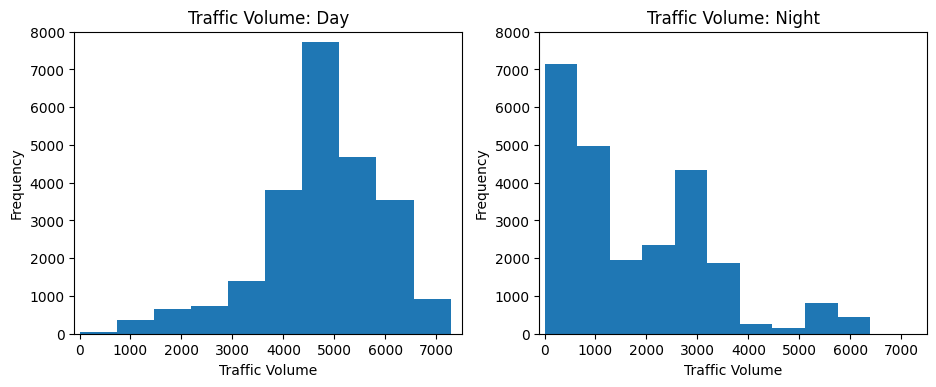

In [9]:
plt.figure(figsize=(11, 4))
plt.subplot(1, 2, 1)
plt.hist(daytime['traffic_volume'])
plt.title('Traffic Volume: Day')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(nighttime['traffic_volume'])
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)

plt.show()

In [10]:
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [11]:
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

From the histograms and the descriptions above, We can see that the daytime traffic is ___left skewed___ meaning that traffic volume is high during the day. The nighttime traffic is ___right skewed___ meaning that there is less traffic during the night.

`75%` of the number of cars passing by the station during the day is 5,559 hourly with a maximum of 7,280 cars passing by the station.

`75%` of the number of cars passing by  the station during the night is 2,819 hourly with a maximum of 6,386 cars passing by the station

Although nighttime has traffic volume of over 5,000 at max, compared to daytime we can consider it having light traffic. Our objective is to find indicators that contribute to heavy traffic, so from here we're going to use the daytime data sinx=ce it seems more appropriate.

## Time Indicators
Time is a very useful indicator for us to use.

There may be more people on the road in a particular month, on a particular day, or at a particular time of day.

We'll look at a few line plots that show how traffic volume changed based on the following parameters:
* Month
* Day of the week
* Time of day

We are going to analyze the traffic volume average for each nonth.

In [12]:
daytime['month'] = daytime['date_time'].dt.month
monthly = daytime.groupby('month').mean()
monthly['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

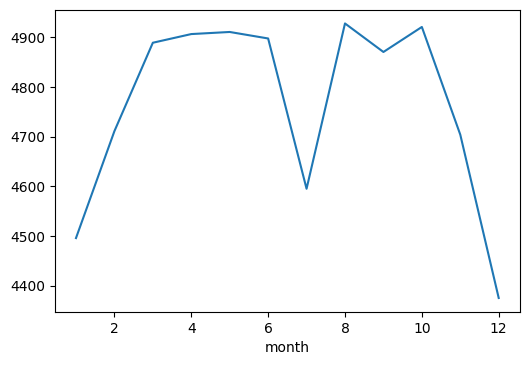

In [13]:
monthly['traffic_volume'].plot.line()
plt.show()

We have high traffic between August and December, We ca also assume that heavy traffic is experienced mostly during the winter time between Nivember and February.

The traffic volume rises steadily between February and June then it drops in July.

Let's look at the change that occured in July.

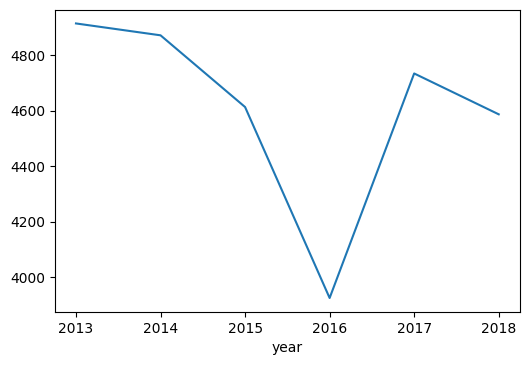

In [14]:
daytime['year'] = daytime['date_time'].dt.year
y_july = daytime[daytime['month'] == 7]
y_july = y_july.groupby('year').mean()
y_july['traffic_volume'].plot.line()

Traffic seems to be generally heavy in July, as it is during other warmer seasons. The exception to this is 2016, which included a significant reduction in traffic volume. One potential explanation is road construction, that is backed by this [2016 article](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696 '2016 article').

As a rough summary, we could indeed tell that warm months generally have much more traffic than cooler months. In a warm month, you can anticipate 5,000 cars to pass through each hour of the day.

## Time Indicators (II)
Here, we will check the average of traffic volumes per day of the week. We will apply the same code as for the monthly averages fo the week days. We will then create a line plot for this.

In [15]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
each_day = daytime.groupby('dayofweek').mean()
each_day['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

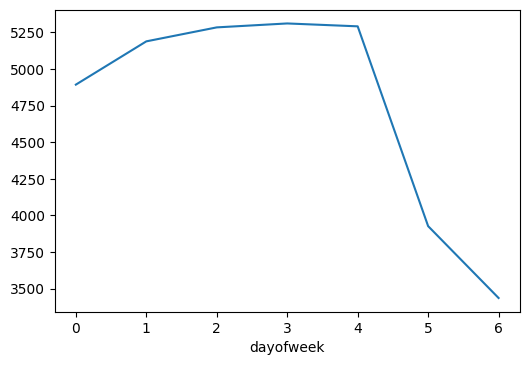

In [16]:
each_day['traffic_volume'].plot.line()
plt.show()

On business days, traffic volume is significantly higher  from Monday to Friday,  With the exception of Monday where we only see values in excess of 5,000 on business days. Weekend traffic is lighter, with values below 4,000 cars.

## Time Indicators (III)
We will create a line plot for the time of day by `hour` for both business days and weekends which we will seperate. We will find the average values seperately for both of them because the weekends will drag down the average values if we look at them as one.

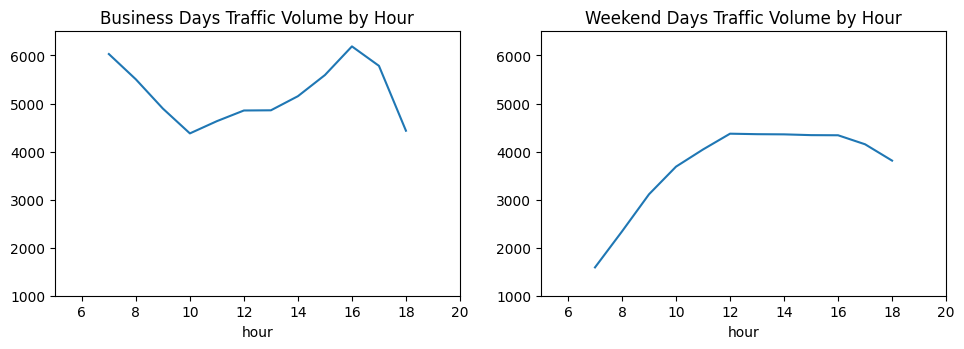

In [17]:
daytime['hour'] = daytime['date_time'].dt.hour
b_days = daytime.copy()[daytime['dayofweek'] <= 4]
w_days = daytime.copy()[daytime['dayofweek'] >= 5]
b_hour = b_days.groupby('hour').mean()
w_hour = w_days.groupby('hour').mean()

plt.figure(figsize=(11.5, 3.5))
plt.subplot(1, 2, 1)
b_hour['traffic_volume'].plot.line()
plt.title('Business Days Traffic Volume by Hour')
plt.xlim(5, 20)
plt.ylim(1000, 6500)

plt.subplot(1, 2, 2)
w_hour['traffic_volume'].plot.line()
plt.title('Weekend Days Traffic Volume by Hour')
plt.xlim(5, 20)
plt.ylim(1000, 6500)

plt.show()

During business days (Monday - Friday), the  traffic volume is significantly higher at each hour of the day. From this analysis, 7 hrs and 16 hrs are the rush hours. Which means most people travel from home to work and back at those times. During rush hour, we see over 6,000 cars in traffic. 

We discovered the following time-related indicators of heavy traffic:
- When compared to cold months, traffic is usually heavier during the warmer seasons (March-October) and (November–February).
- Business days typically have more traffic than weekends.
- The rush hours on business days are at 7 hrs and 16 hrs.

## Weather Indicators
For weather indicators, we are going to look at the following columns:
* temp
* rain_1h
* snow_1h
* clouds_all
* weather_main
* weather_description

We are going to find out their correlation with `traffic_volume` since they are numerical columns.

In [18]:
daytime.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

The `temp` column is the one with the strongest correlation of about `0.1283`. The other columns `rain_1h`, `snow_1h` and `clouds_all` have less strong correlation to `traffic_volume` when compared to `temp` column. 

We are now going to do a scatter plot to show the correlation of `temperature` to `traffic_volume`.

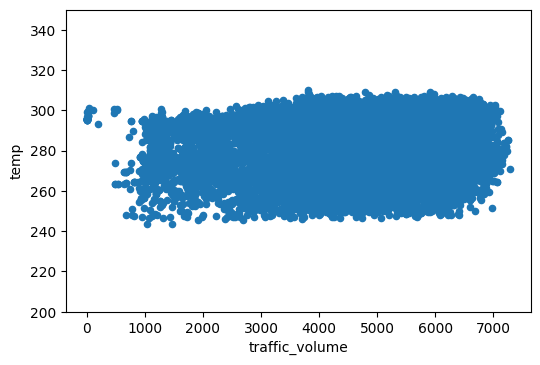

In [19]:
daytime.plot.scatter('traffic_volume', 'temp')
plt.ylim(200, 350) # the y-axis was being messed up by temp values
plt.show()

Temperature doesn't seem to be the best indicator for us to use for indicating heavy traffic. We'll now try the other columns for weather indicators. 

## Weather Types
We are now going to use unique values in columns `weather_main` and `weather_description` to find the average traffic volume associated with each of them. 

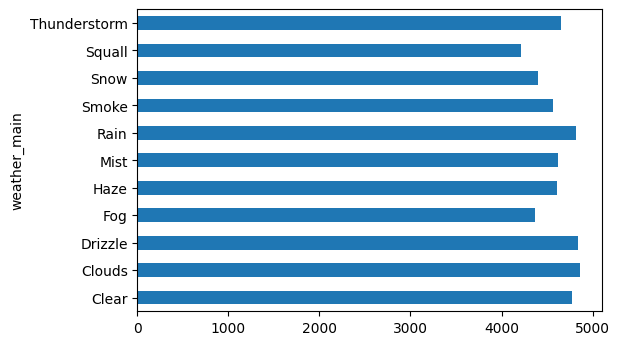

In [20]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

There doesn't seem to be any weather condition when there are more than 5,000 cars on the road. This makes it more challenging to locate a high traffic indicator. Additionally, let's group by `weather_description`, which has a finer-grained classification of the weather.

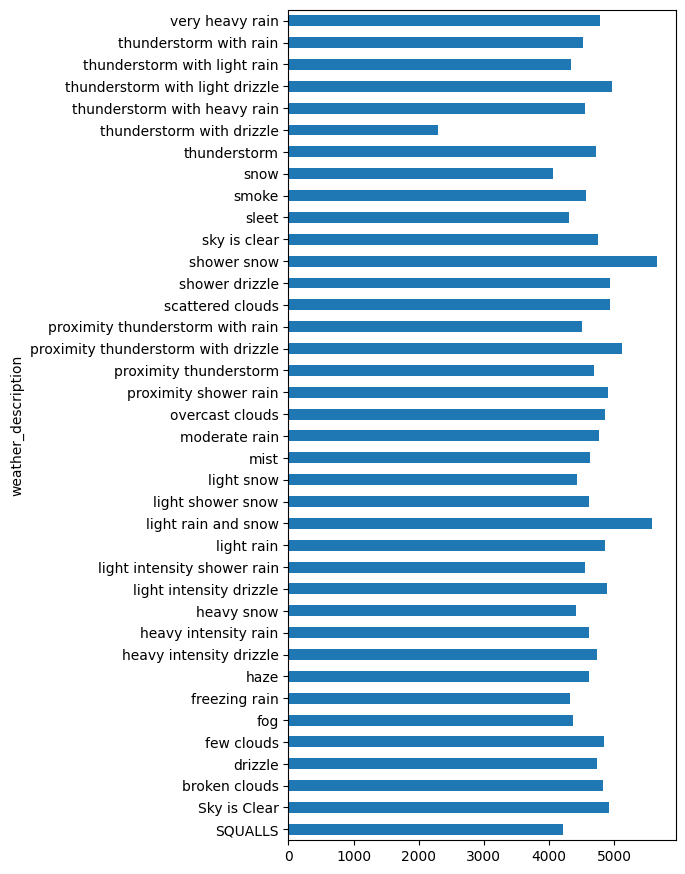

In [21]:
by_weather_description = daytime.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5, 11))
plt.show()

There appears to be three weather types where traffic volume exceeds 5,000:
* Snowfall is forecast.
* Thunderstorm with drizzle in the vicinity
* Snow and light rain

It's unclear why these weather types have the highest average traffic values and they not particularly severe. When the weather is bad, perhaps more people take their cars out of the garage instead using other means such as bikes or walking.

# Conclusion
From our analysis in this project, we were trying to discover the indicators for heavy traffic along I-94 Interstate highway.

The traffic data was recorded by a station located approximately midway between Minneapolis and Saint Paul. The station records westbound traffic only which means, they record cars moving from east to west.

We mainly focused on the westbound traffic near that station and through out our analysis we found two major indicators that coontribute to heavy traffic on I-94 Interstate highway. These are:
- Time indicators
- Weather indicators

The time indicators are:
* When compared to cold months, traffic is usually heavier during the warmer seasons (March-October) and (November–February).
* Business days typically have more traffic than weekends.
* The rush hours on business days are at 7 hrs and 16 hrs.

The weather indicators are:
* Snowfall is forecast.
* Thunderstorm with drizzle in the vicinity
* Snow and light rain